In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from numpy import array
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, TimeDistributed, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/mhealth_full.csv'
df= pd.read_csv(path)
df

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
0,-9.8184,0.009971,0.29563,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,...,-4.5781,0.187760,-0.449020,-1.01030,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,...,-4.3198,0.023595,-0.449020,-1.01030,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,...,-4.2772,0.275720,-0.449020,-1.01030,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,...,-4.3163,0.367520,-0.456860,-1.00820,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,...,-4.1459,0.407290,-0.456860,-1.00820,0.025862,-0.53684,0.175900,-1.095500,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,-9.2476,-0.248070,-2.62230,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-0.687640,...,-8.9071,0.294230,0.041176,-0.99384,-0.480600,2.40890,7.496100,7.915500,0,subject10
1215741,-9.4632,-0.073513,-2.11190,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-0.868190,...,-8.7455,0.448140,0.041176,-0.99384,-0.480600,1.69450,7.866000,7.897500,0,subject10
1215742,-9.4011,-0.144580,-3.02350,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-0.868410,...,-9.1155,0.450480,0.041176,-0.99384,-0.480600,1.15770,8.052800,7.884900,0,subject10
1215743,-9.3732,-0.026252,-2.70760,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-0.339790,...,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0.27441,9.487900,5.325800,0,subject10


In [5]:
columns = ['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z',
       'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z',
       'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z',
       'mag_rw_x', 'mag_rw_y', 'mag_rw_z']


In [6]:
def scaler(data, columns):

  for column in columns:
        data[column] = (data[column] - np.mean(data[column])) / np.std(data[column])
  return data
df = scaler(df, columns)

    0: 'Null',
    1: 'Standing still',
    2: 'Sitting and relaxing',
    3: 'Lying down',
    4: 'Walking',
    5: 'Climbing stairs',
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms',
    8: 'Knees bending (crouching)',
    9: 'Cycling',
    10: 'Jogging',
    11: 'Running',
    12: 'Jump front & back'

In [7]:
#df_activity_1 = df[df['activity'] == 1]
#df_activity_2 = df[df['activity'] == 2]
#df_activity_3 = df[df['activity'] == 3]
df_activity_4 = df[df['activity'] == 4]
df_activity_5 = df[df['activity'] == 5]
df_activity_6 = df[df['activity'] == 6]
df_activity_7 = df[df['activity'] == 7]
df_activity_8 = df[df['activity'] == 8]
df_activity_9 = df[df['activity'] == 9]
df_activity_10 = df[df['activity'] == 10]
df_activity_11 = df[df['activity'] == 11]
df_activity_12 = df[df['activity'] == 12]

In [8]:
df = pd.concat([df_activity_4, df_activity_5, df_activity_6, df_activity_7,
                df_activity_8, df_activity_9, df_activity_10, df_activity_11,df_activity_12])

In [9]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
df['activity']=label.fit_transform(df['activity'])

In [10]:
df.activity.value_counts()

0    30720
1    30720
5    30720
6    30720
7    30720
3    29441
4    29337
2    28315
8    10342
Name: activity, dtype: int64

In [11]:
X = df.drop(['activity', 'subject'], axis=1)
y = df['activity']

In [12]:
TIME_PERIODS = 50
STEP_DISTANCE = 25
LABEL = 'activity'

def create_segments_and_labels(data, time_steps, step, label_name, columns):
    pd.options.mode.chained_assignment = None  # default='warn'
    N_FEATURES = len(columns)
    # make segments
    segments = []
    labels = []
    for i in range(0, len(data) - time_steps, step):
        segment = []
        for column in columns:
            segment.append(data[column].values[i: i + time_steps])
        segments.append(segment)
        label = stats.mode(data[label_name][i: i + time_steps])[0]
        labels.append(label)
    segments = np.asarray(segments, dtype= np.float32)
    reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, time_steps, N_FEATURES)
    print('reshaped_segments shape : ', reshaped_segments.shape)
    labels = np.asarray(labels)
    print('labels shape :', labels.shape)
    return reshaped_segments, labels
X_data, y_data = create_segments_and_labels(df, TIME_PERIODS, STEP_DISTANCE, LABEL, columns)

reshaped_segments shape :  (10040, 50, 21)
labels shape : (10040,)


In [13]:
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=1, stratify=  y_data)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8032, 50, 21), (2008, 50, 21), (8032,), (2008,))

In [15]:
# Scale train/ test predictors based on training data
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [16]:
# Create train and test sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1,stratify=  y_train)

In [17]:
# Convert output variables to categorical for CNN
y_train = to_categorical(y_train)
print(y_train.shape)

y_test = to_categorical(y_test)
print(y_test.shape)

y_val = to_categorical(y_val)
print(y_val.shape)

(6425, 9)
(2008, 9)
(1607, 9)


In [18]:
n_steps = 2
n_features = X_train.shape[2]
n_length = 25

X_train = X_train.reshape((X_train.shape[0], n_steps, n_length, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_length, n_features))
X_val = X_val.reshape((X_val.shape[0], n_steps, n_length, n_features))

In [19]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(6425, 2, 25, 21) (6425, 9) (2008, 2, 25, 21) (2008, 9)


In [20]:
# Produce variables for CNN input/output shape
#Epoch 500

BATCH_SIZE = 32

verbose,epochs,batch_size=1,10, BATCH_SIZE

n_timesteps, n_features, n_outputs = n_steps * n_length, X_train.shape[3], y_train.shape[1]
#n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train.shape[1]
n_timesteps,n_features,n_outputs

(50, 21, 9)


# CNN- LSTM


In [26]:
# Results summarizer function (scores, confusion matrix) for classification results
def results_summarizer(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    activity_map = {
        #0: 'Lying down',
        #1: 'Standing still',
        #2: 'Sitting and relaxing'
        3: 'Walking',
        4: 'Climbing stairs',
        5: 'Waist bends forward',
        6: 'Frontal elevation of arms',
        7: 'Knees bending (crouching)',
        8: 'Cycling',
        9: 'Jogging',
        10: 'Running',
        11: 'Jump front & back'
    }
    plt.figure(figsize=(14, 12))

    sns.heatmap(cm,
                annot=True,
                cmap='Blues',
                xticklabels=activity_map.values(),
                yticklabels=activity_map.values()
               )

    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Activity')
    plt.ylabel('Actual Activity')
    plt.show()

    print(f'Accuracy Score: ' + '{:.4%}'.format(acc))
    print(f'Precision Score: ' + '{:.4%}'.format(prec))
    print(f'Recall Score: ' + '{:.4%}'.format(rec))
    print(f'F_1 Score: ' + '{:.4%}'.format(f1))

# Layer3

# CNN1 - LSTM2

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, None, 23, 64)      4096      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, None, 23, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, None, 11, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, None, 704)         0         
 stributed)                                                      
                                                                 
 lstm (LSTM)                 (None, None, 100)         3

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 20s 14ms/step - loss: 0.8289 - accuracy: 0.7038 - val_loss: 0.1689 - val_accuracy: 0.9303
Epoch 2/10
201/201 [==============================] - 2s 11ms/step - loss: 0.2430 - accuracy: 0.9104 - val_loss: 0.0965 - val_accuracy: 0.9552
Epoch 3/10
201/201 [==============================] - 2s 11ms/step - loss: 0.1591 - accuracy: 0.9404 - val_loss: 0.0514 - val_accuracy: 0.9788
Epoch 4/10
201/201 [==============================] - 2s 9ms/step - loss: 0.1304 - accuracy: 0.9538 - val_loss: 0.0383 - val_accuracy: 0.9857
Epoch 5/10
201/201 [==============================] - 2s 8ms/step - loss: 0.1152 - accuracy: 0.9600 - val_loss: 0.0454 - val_accuracy: 0.9844
Epoch 6/10
201/201 [==============================] - 2s 8ms/step - loss: 0.0974 - accuracy: 0.9656 - val_loss: 0.0253 - val_accuracy: 0.9925
Epoch 7/10
201/201 [==============================] - 2s 8ms/step - loss: 0.0855 - accuracy: 0.9696 - val_loss: 0.0506 - val_accuracy: 0.9826
Ep

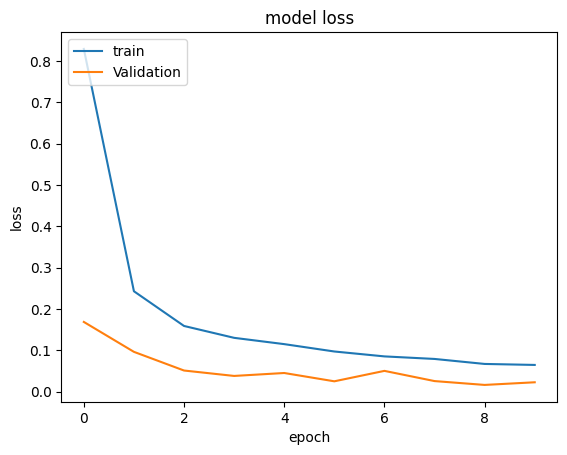

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

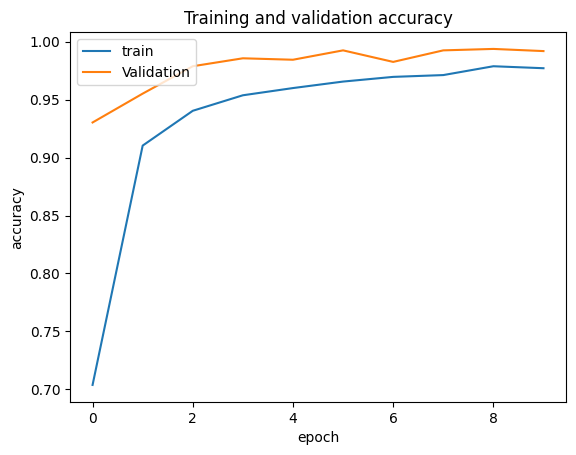

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

63/63 [==============================] - 1s 4ms/step


(2008, 1)

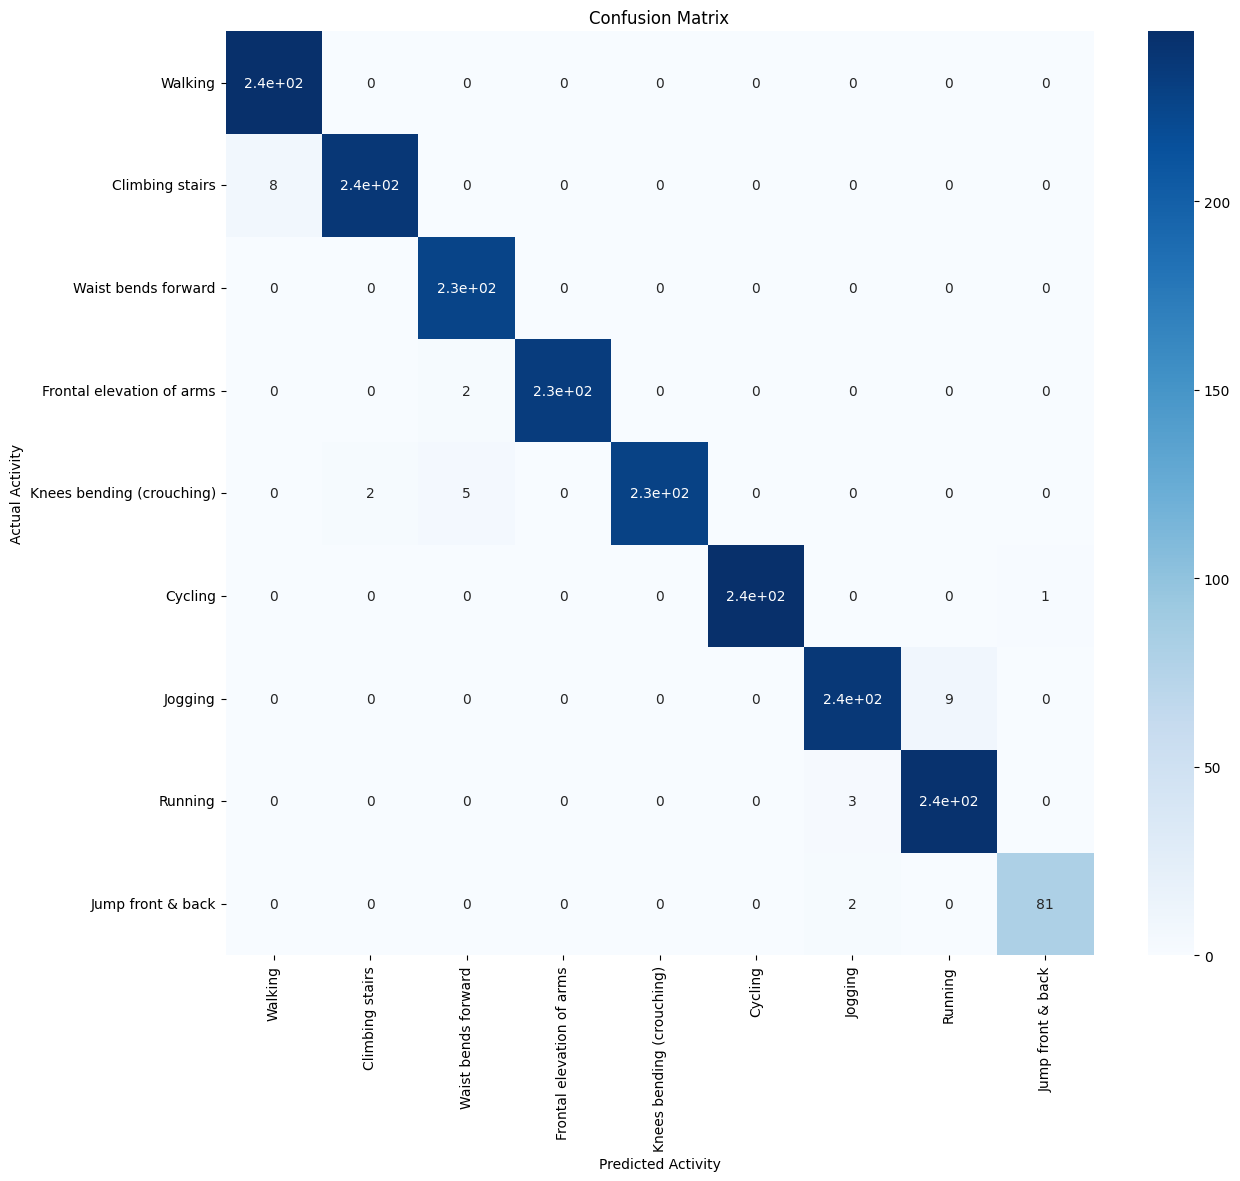

Accuracy Score: 98.4064%
Precision Score: 98.4604%
Recall Score: 98.3582%
F_1 Score: 98.3968%


In [ ]:
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2 - LSTM1

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))

model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(100))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_4 (TimeDi  (None, None, 23, 64)      4096      
 stributed)                                                      
                                                                 
 time_distributed_5 (TimeDi  (None, None, 21, 64)      12352     
 stributed)                                                      
                                                                 
 time_distributed_6 (TimeDi  (None, None, 21, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_7 (TimeDi  (None, None, 10, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_8 (TimeDi  (None, None, 640)        

In [ ]:

# define model
#model = Sequential()
#model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))
#model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))

#model.add(TimeDistributed(Dropout(0.5)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

#model.add(TimeDistributed(Flatten()))


#model.add(LSTM(100))
#model.add(Dropout(0.5))
#model.add(Dense(100, activation='relu'))
#model.add(Dense(n_outputs, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.summary()

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 5s 10ms/step - loss: 0.7341 - accuracy: 0.7377 - val_loss: 0.1718 - val_accuracy: 0.9515
Epoch 2/10
201/201 [==============================] - 2s 8ms/step - loss: 0.2180 - accuracy: 0.9200 - val_loss: 0.0886 - val_accuracy: 0.9645
Epoch 3/10
201/201 [==============================] - 1s 7ms/step - loss: 0.1405 - accuracy: 0.9522 - val_loss: 0.0728 - val_accuracy: 0.9801
Epoch 4/10
201/201 [==============================] - 2s 7ms/step - loss: 0.1007 - accuracy: 0.9639 - val_loss: 0.0509 - val_accuracy: 0.9844
Epoch 5/10
201/201 [==============================] - 2s 8ms/step - loss: 0.0736 - accuracy: 0.9726 - val_loss: 0.0331 - val_accuracy: 0.9900
Epoch 6/10
201/201 [==============================] - 2s 9ms/step - loss: 0.0564 - accuracy: 0.9807 - val_loss: 0.0240 - val_accuracy: 0.9919
Epoch 7/10
201/201 [==============================] - 2s 9ms/step - loss: 0.0428 - accuracy: 0.9855 - val_loss: 0.0275 - val_accuracy: 0.9913
Epoch

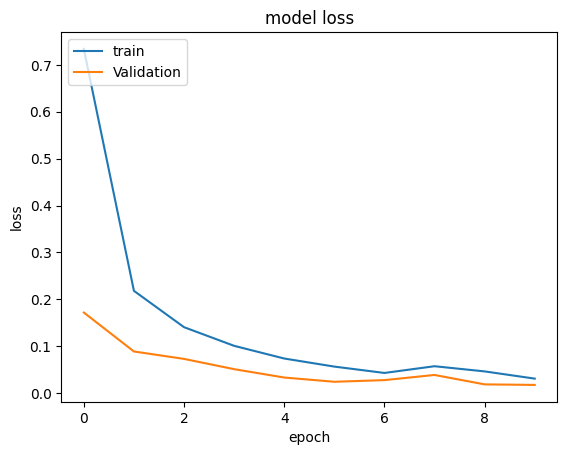

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

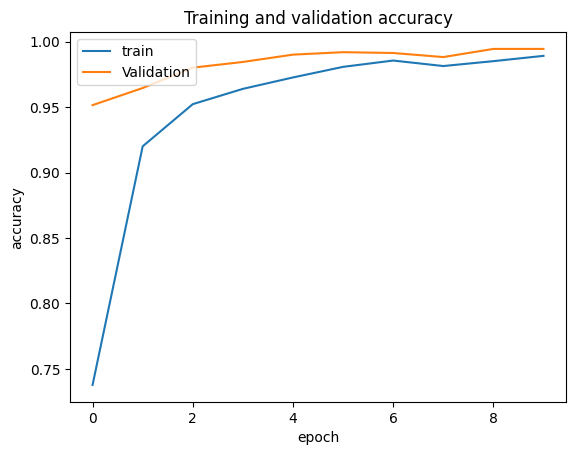

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape

63/63 [==============================] - 1s 3ms/step


(2008, 1)

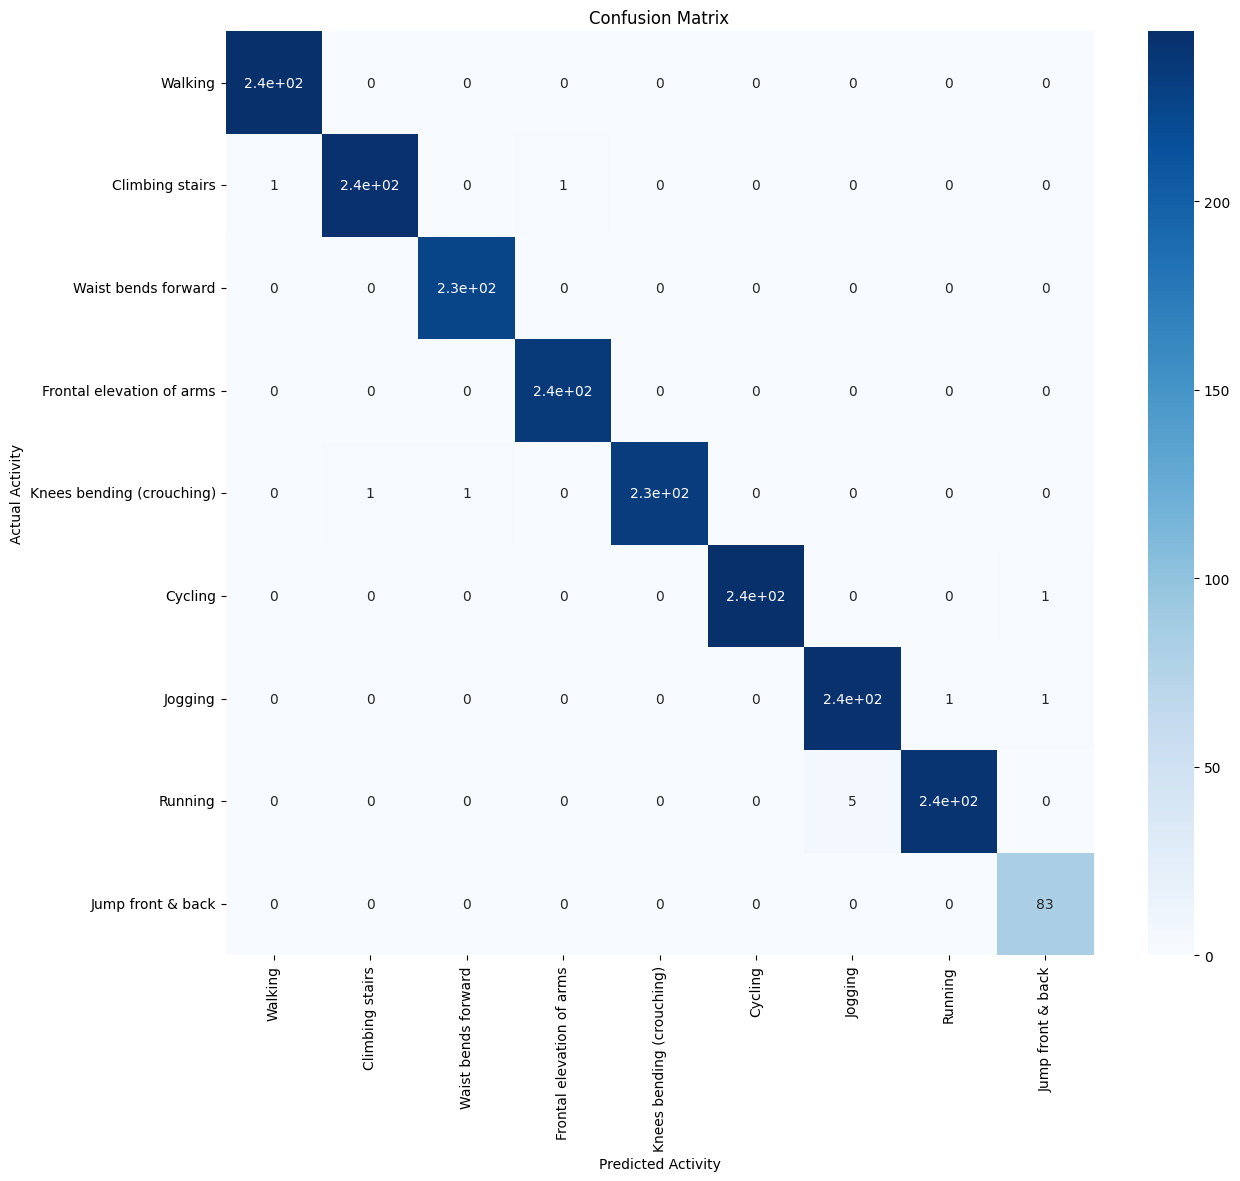

Accuracy Score: 99.4024%
Precision Score: 99.2830%
Recall Score: 99.4538%
F_1 Score: 99.3652%


In [ ]:

y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# layer 4

# CNN 1 - LSTM3

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))


model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_9 (TimeDi  (None, None, 23, 64)      4096      
 stributed)                                                      
                                                                 
 time_distributed_10 (TimeD  (None, None, 23, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_11 (TimeD  (None, None, 11, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_12 (TimeD  (None, None, 704)         0         
 istributed)                                                     
                                                                 
 lstm_3 (LSTM)               (None, None, 100)        

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 16s 24ms/step - loss: 1.0172 - accuracy: 0.6016 - val_loss: 0.2930 - val_accuracy: 0.8942
Epoch 2/10
201/201 [==============================] - 3s 17ms/step - loss: 0.3325 - accuracy: 0.8788 - val_loss: 0.1410 - val_accuracy: 0.9415
Epoch 3/10
201/201 [==============================] - 3s 15ms/step - loss: 0.2333 - accuracy: 0.9170 - val_loss: 0.0753 - val_accuracy: 0.9788
Epoch 4/10
201/201 [==============================] - 3s 16ms/step - loss: 0.1616 - accuracy: 0.9433 - val_loss: 0.0412 - val_accuracy: 0.9844
Epoch 5/10
201/201 [==============================] - 3s 14ms/step - loss: 0.1577 - accuracy: 0.9424 - val_loss: 0.0571 - val_accuracy: 0.9757
Epoch 6/10
201/201 [==============================] - 2s 10ms/step - loss: 0.1247 - accuracy: 0.9588 - val_loss: 0.0475 - val_accuracy: 0.9826
Epoch 7/10
201/201 [==============================] - 2s 10ms/step - loss: 0.1136 - accuracy: 0.9625 - val_loss: 0.0353 - val_accuracy: 0.985

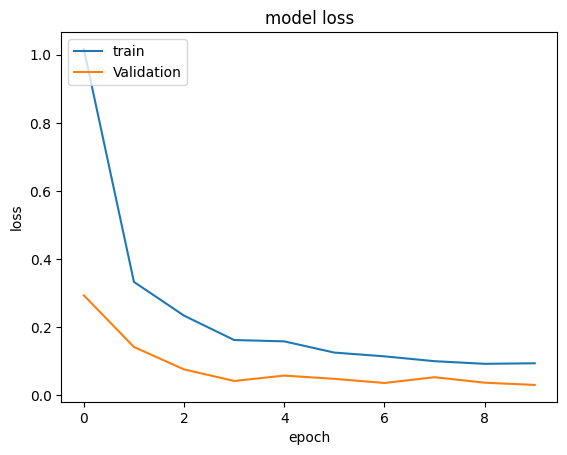

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

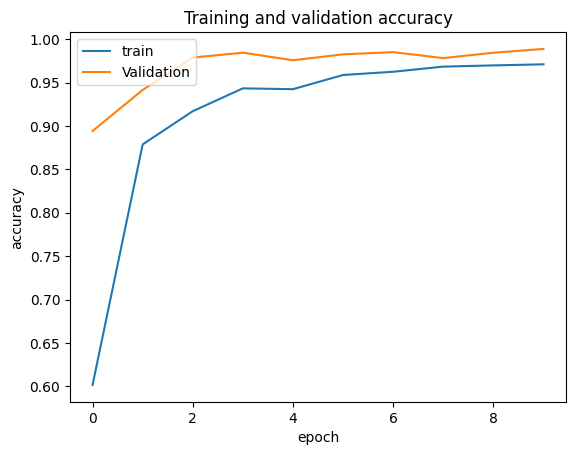

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

63/63 [==============================] - 2s 4ms/step


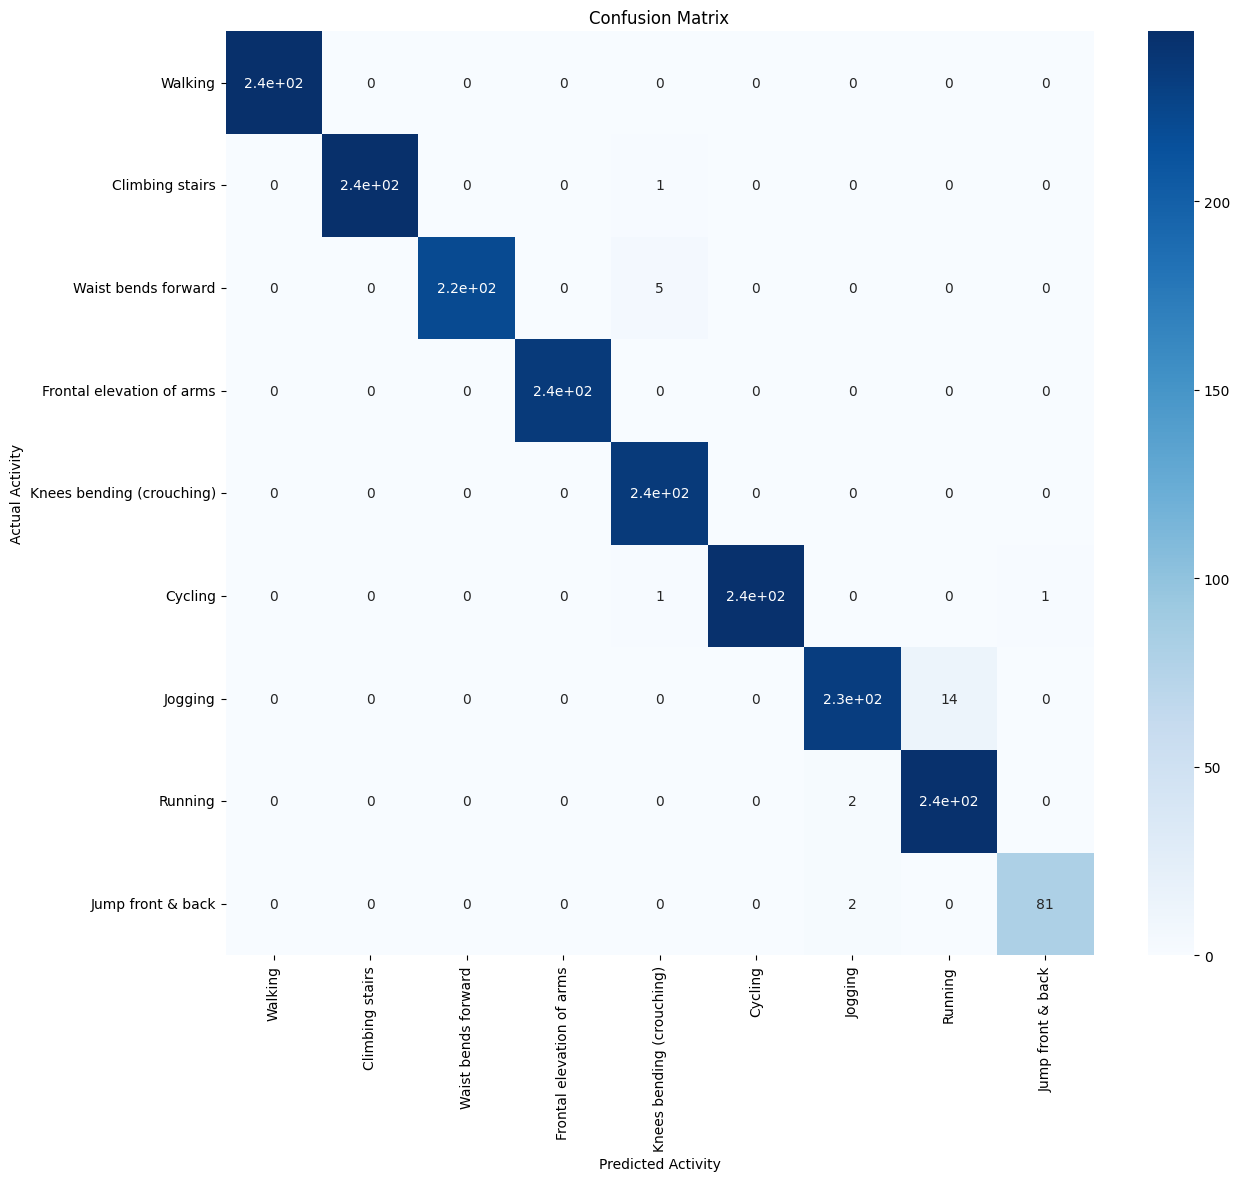

Accuracy Score: 98.7052%
Precision Score: 98.7519%
Recall Score: 98.6283%
F_1 Score: 98.6750%


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2 - LSTM2



In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_13 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_14 (TimeD  (None, None, 21, 64)      12352     
 istributed)                                                     
                                                                 
 time_distributed_15 (TimeD  (None, None, 21, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_16 (TimeD  (None, None, 10, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_17 (TimeD  (None, None, 640)        

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 11s 33ms/step - loss: 0.8691 - accuracy: 0.6903 - val_loss: 0.1512 - val_accuracy: 0.9409
Epoch 2/10
201/201 [==============================] - 2s 12ms/step - loss: 0.2366 - accuracy: 0.9114 - val_loss: 0.1353 - val_accuracy: 0.9384
Epoch 3/10
201/201 [==============================] - 2s 8ms/step - loss: 0.1489 - accuracy: 0.9443 - val_loss: 0.0689 - val_accuracy: 0.9726
Epoch 4/10
201/201 [==============================] - 2s 10ms/step - loss: 0.1167 - accuracy: 0.9592 - val_loss: 0.0430 - val_accuracy: 0.9795
Epoch 5/10
201/201 [==============================] - 3s 13ms/step - loss: 0.0864 - accuracy: 0.9715 - val_loss: 0.0339 - val_accuracy: 0.9863
Epoch 6/10
201/201 [==============================] - 2s 10ms/step - loss: 0.0837 - accuracy: 0.9720 - val_loss: 0.0269 - val_accuracy: 0.9907
Epoch 7/10
201/201 [==============================] - 3s 16ms/step - loss: 0.0718 - accuracy: 0.9756 - val_loss: 0.0228 - val_accuracy: 0.9919

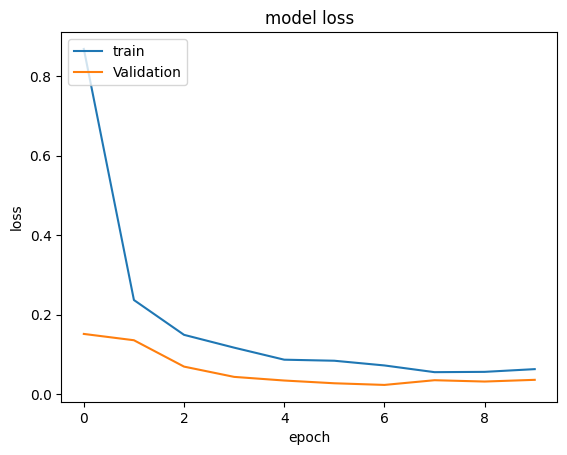

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

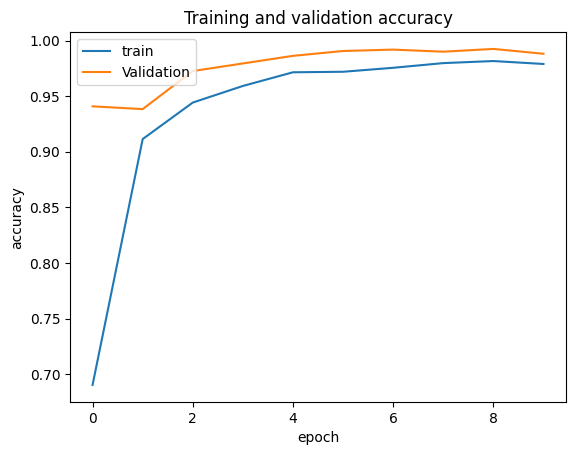

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

63/63 [==============================] - 1s 3ms/step


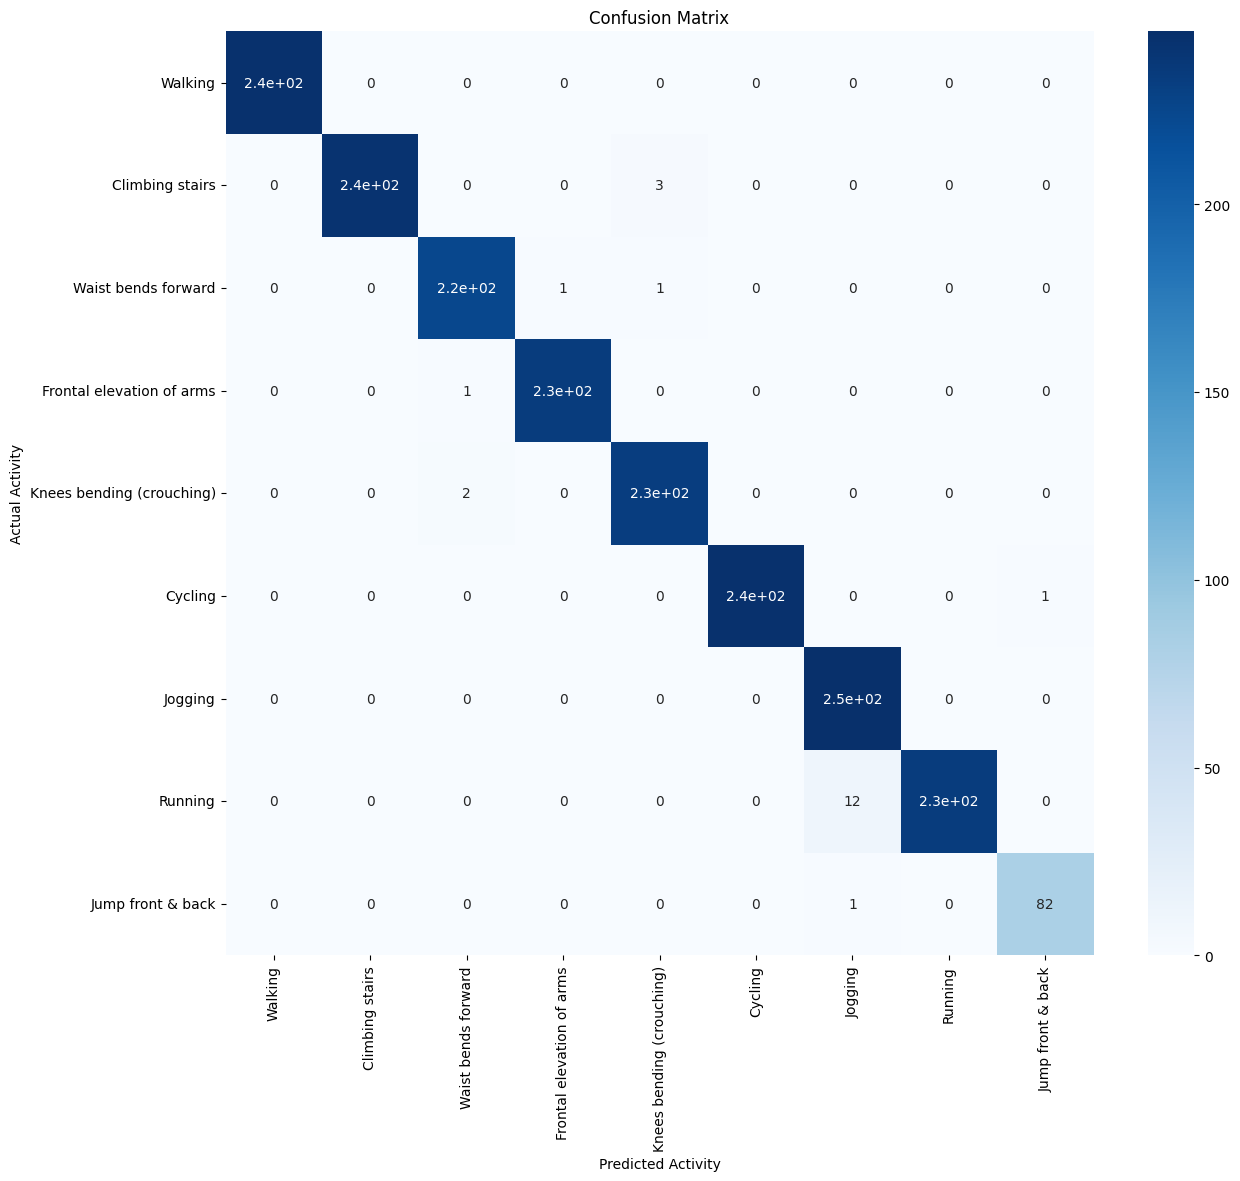

Accuracy Score: 98.9044%
Precision Score: 98.9268%
Recall Score: 98.9033%
F_1 Score: 98.9004%


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN3 - LSTM1

In [ ]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))


model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

model.add(TimeDistributed(Flatten()))


model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_18 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_19 (TimeD  (None, None, 21, 64)      12352     
 istributed)                                                     
                                                                 
 time_distributed_20 (TimeD  (None, None, 21, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_21 (TimeD  (None, None, 10, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_22 (TimeD  (None, None, 8, 64)      

In [ ]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 10s 31ms/step - loss: 1.0531 - accuracy: 0.6006 - val_loss: 0.4176 - val_accuracy: 0.8438
Epoch 2/10
201/201 [==============================] - 2s 12ms/step - loss: 0.4460 - accuracy: 0.8255 - val_loss: 0.2308 - val_accuracy: 0.9147
Epoch 3/10
201/201 [==============================] - 2s 10ms/step - loss: 0.3058 - accuracy: 0.8848 - val_loss: 0.1343 - val_accuracy: 0.9521
Epoch 4/10
201/201 [==============================] - 2s 8ms/step - loss: 0.2385 - accuracy: 0.9054 - val_loss: 0.0993 - val_accuracy: 0.9633
Epoch 5/10
201/201 [==============================] - 2s 8ms/step - loss: 0.1917 - accuracy: 0.9306 - val_loss: 0.1045 - val_accuracy: 0.9608
Epoch 6/10
201/201 [==============================] - 2s 9ms/step - loss: 0.1649 - accuracy: 0.9379 - val_loss: 0.1036 - val_accuracy: 0.9540
Epoch 7/10
201/201 [==============================] - 2s 9ms/step - loss: 0.1487 - accuracy: 0.9454 - val_loss: 0.0998 - val_accuracy: 0.9614
Ep

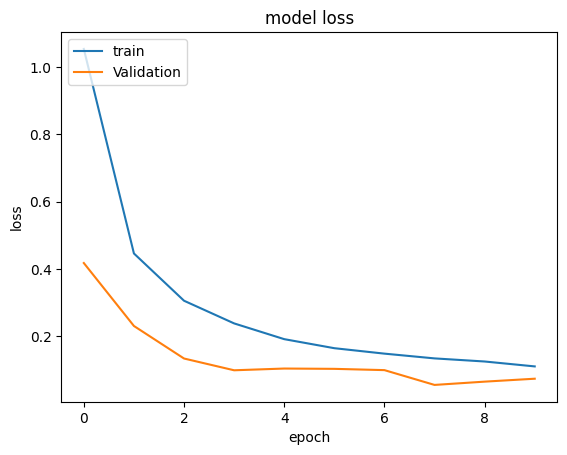

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

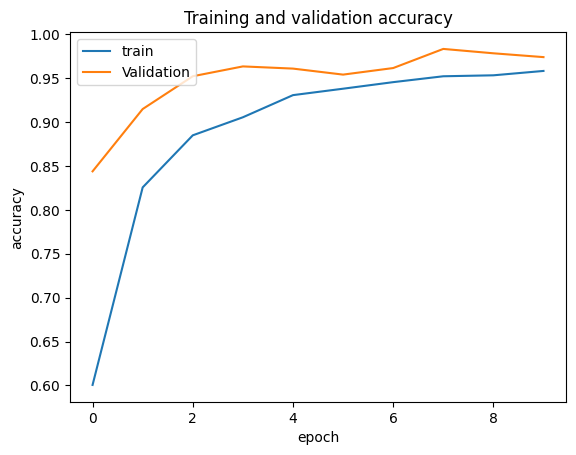

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

63/63 [==============================] - 1s 3ms/step


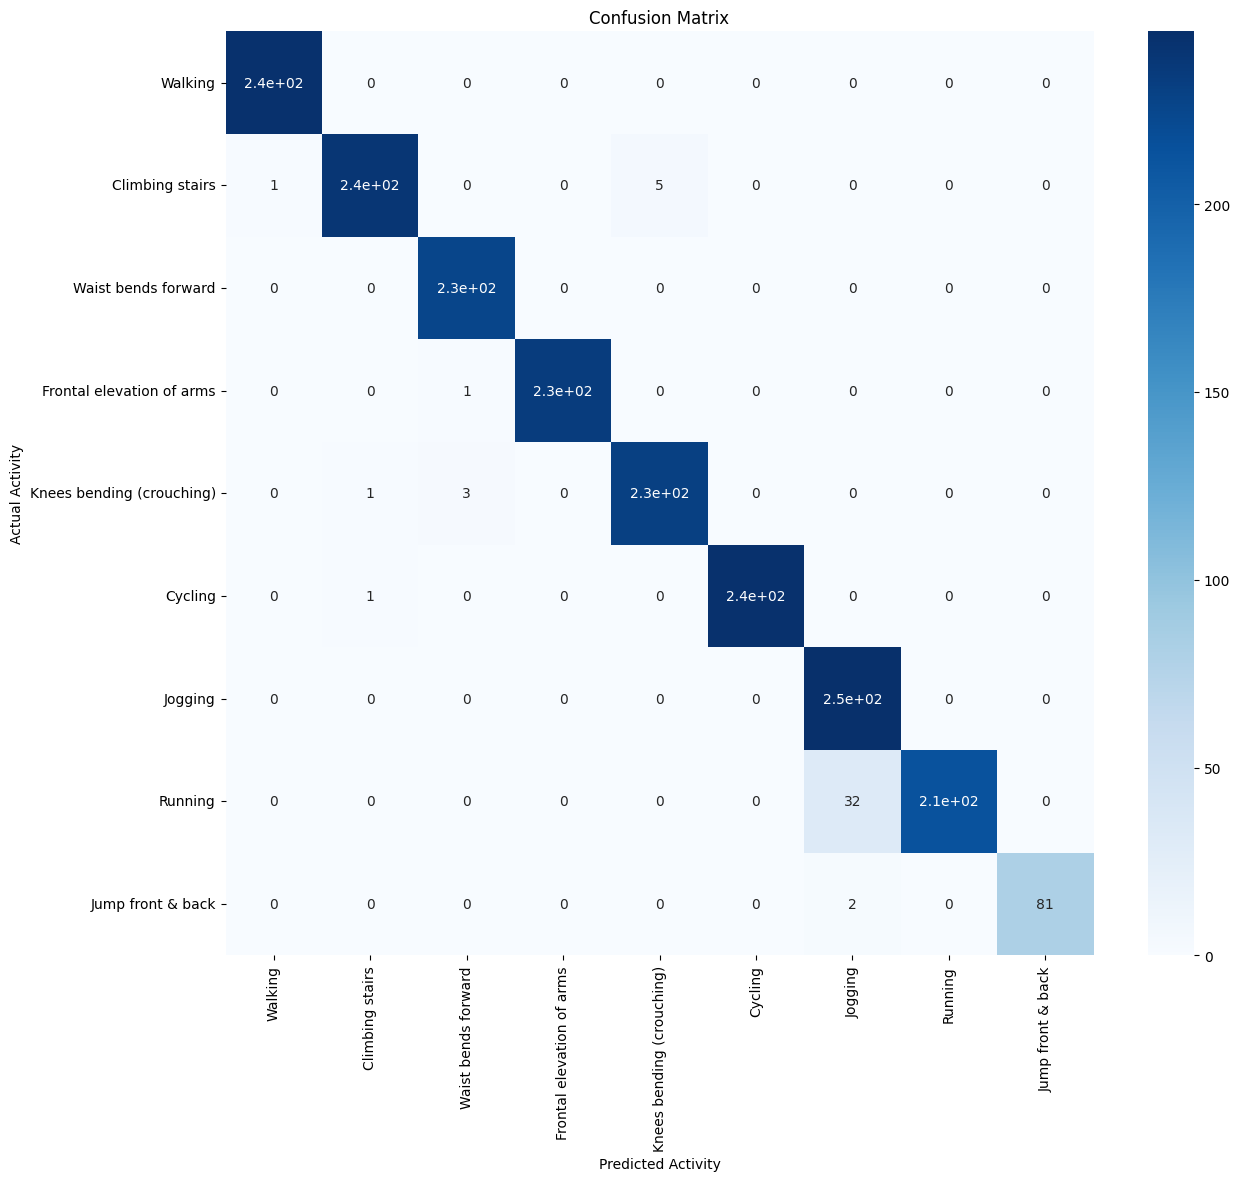

Accuracy Score: 97.7092%
Precision Score: 98.0852%
Recall Score: 97.7343%
F_1 Score: 97.8125%


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# Layer5

# CNN4 - LSTM1

In [39]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))


model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))

model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))


model.add(TimeDistributed(Flatten()))


model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_22 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_23 (TimeD  (None, None, 21, 64)      12352     
 istributed)                                                     
                                                                 
 time_distributed_24 (TimeD  (None, None, 21, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_25 (TimeD  (None, None, 10, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_26 (TimeD  (None, None, 8, 64)      

In [40]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 5s 11ms/step - loss: 1.0267 - accuracy: 0.6079 - val_loss: 0.4074 - val_accuracy: 0.8382
Epoch 2/10
201/201 [==============================] - 2s 9ms/step - loss: 0.4237 - accuracy: 0.8349 - val_loss: 0.2201 - val_accuracy: 0.9322
Epoch 3/10
201/201 [==============================] - 2s 9ms/step - loss: 0.2912 - accuracy: 0.8901 - val_loss: 0.1775 - val_accuracy: 0.9210
Epoch 4/10
201/201 [==============================] - 2s 10ms/step - loss: 0.2112 - accuracy: 0.9180 - val_loss: 0.1551 - val_accuracy: 0.9371
Epoch 5/10
201/201 [==============================] - 2s 11ms/step - loss: 0.1827 - accuracy: 0.9343 - val_loss: 0.1108 - val_accuracy: 0.9583
Epoch 6/10
201/201 [==============================] - 2s 9ms/step - loss: 0.1409 - accuracy: 0.9485 - val_loss: 0.0598 - val_accuracy: 0.9844
Epoch 7/10
201/201 [==============================] - 2s 8ms/step - loss: 0.1417 - accuracy: 0.9468 - val_loss: 0.0800 - val_accuracy: 0.9714
Epo

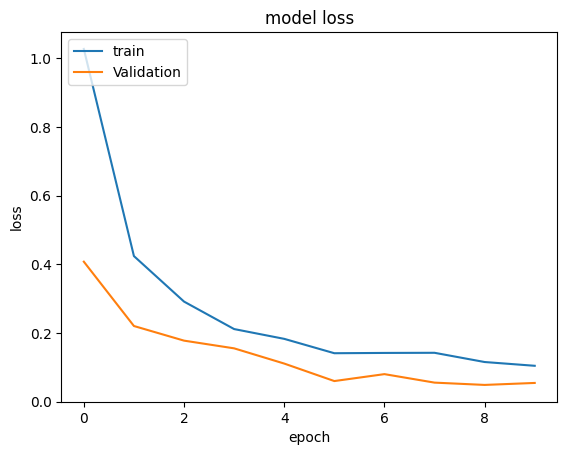

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

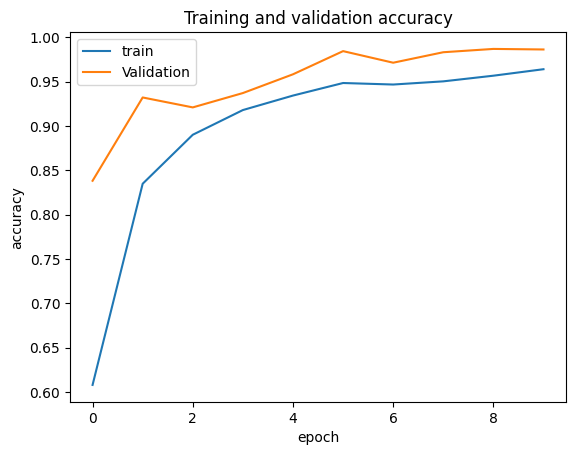

In [42]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

63/63 [==============================] - 1s 4ms/step


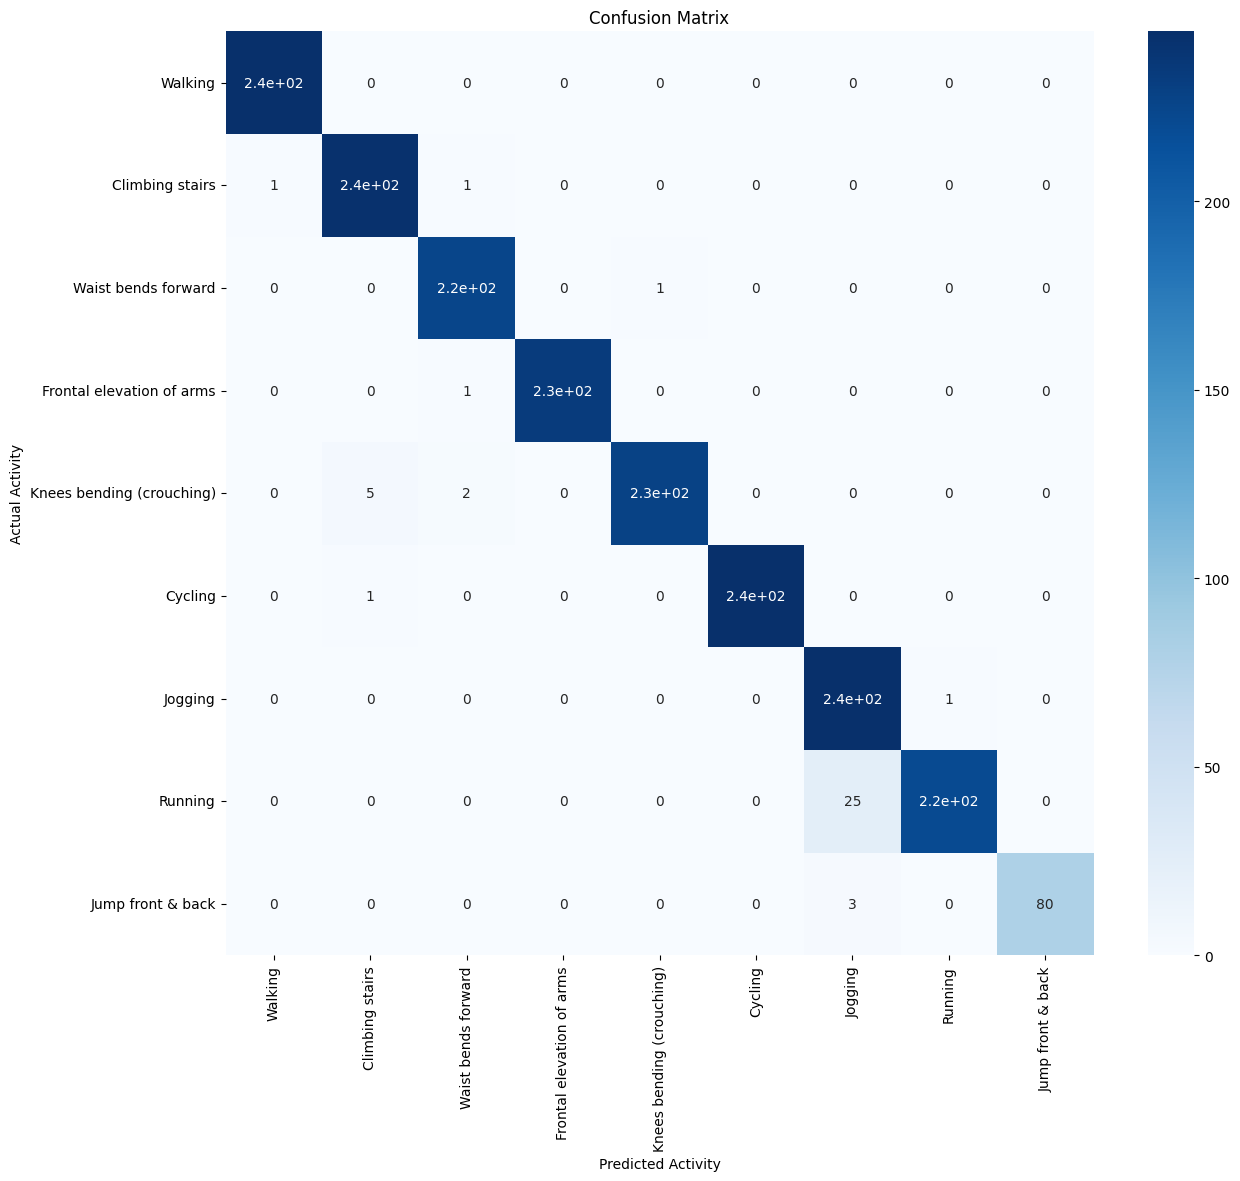

Accuracy Score: 97.9582%
Precision Score: 98.2559%
Recall Score: 97.8611%
F_1 Score: 97.9955%


In [43]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

#CNN3 - LSTM2

In [21]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))


model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))


model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))


model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, None, 23, 64)      4096      
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, None, 21, 64)      12352     
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, None, 21, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, None, 10, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, None, 8, 64)       1

In [22]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 25s 14ms/step - loss: 1.1552 - accuracy: 0.5642 - val_loss: 0.4114 - val_accuracy: 0.8475
Epoch 2/10
201/201 [==============================] - 2s 9ms/step - loss: 0.4859 - accuracy: 0.8050 - val_loss: 0.1839 - val_accuracy: 0.9303
Epoch 3/10
201/201 [==============================] - 2s 11ms/step - loss: 0.3557 - accuracy: 0.8607 - val_loss: 0.1233 - val_accuracy: 0.9452
Epoch 4/10
201/201 [==============================] - 2s 12ms/step - loss: 0.2659 - accuracy: 0.8965 - val_loss: 0.1383 - val_accuracy: 0.9477
Epoch 5/10
201/201 [==============================] - 2s 11ms/step - loss: 0.2286 - accuracy: 0.9155 - val_loss: 0.0751 - val_accuracy: 0.9751
Epoch 6/10
201/201 [==============================] - 2s 9ms/step - loss: 0.1920 - accuracy: 0.9323 - val_loss: 0.0678 - val_accuracy: 0.9751
Epoch 7/10
201/201 [==============================] - 2s 9ms/step - loss: 0.1788 - accuracy: 0.9360 - val_loss: 0.0676 - val_accuracy: 0.9757
E

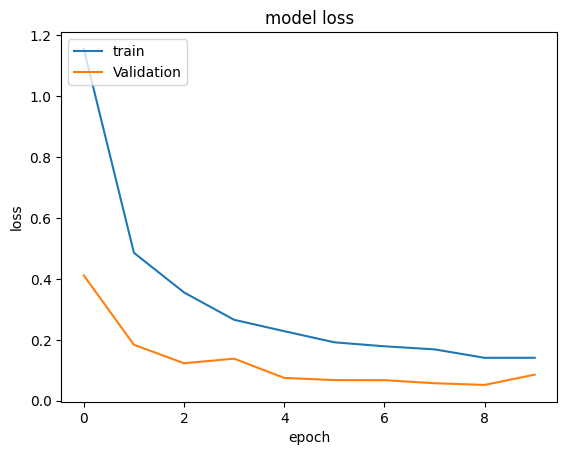

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

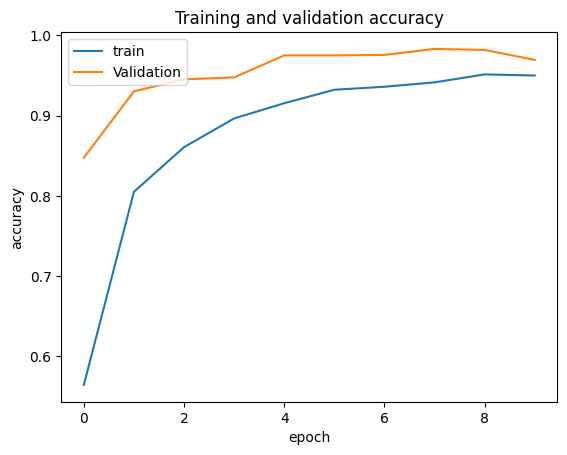

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

63/63 [==============================] - 0s 4ms/step


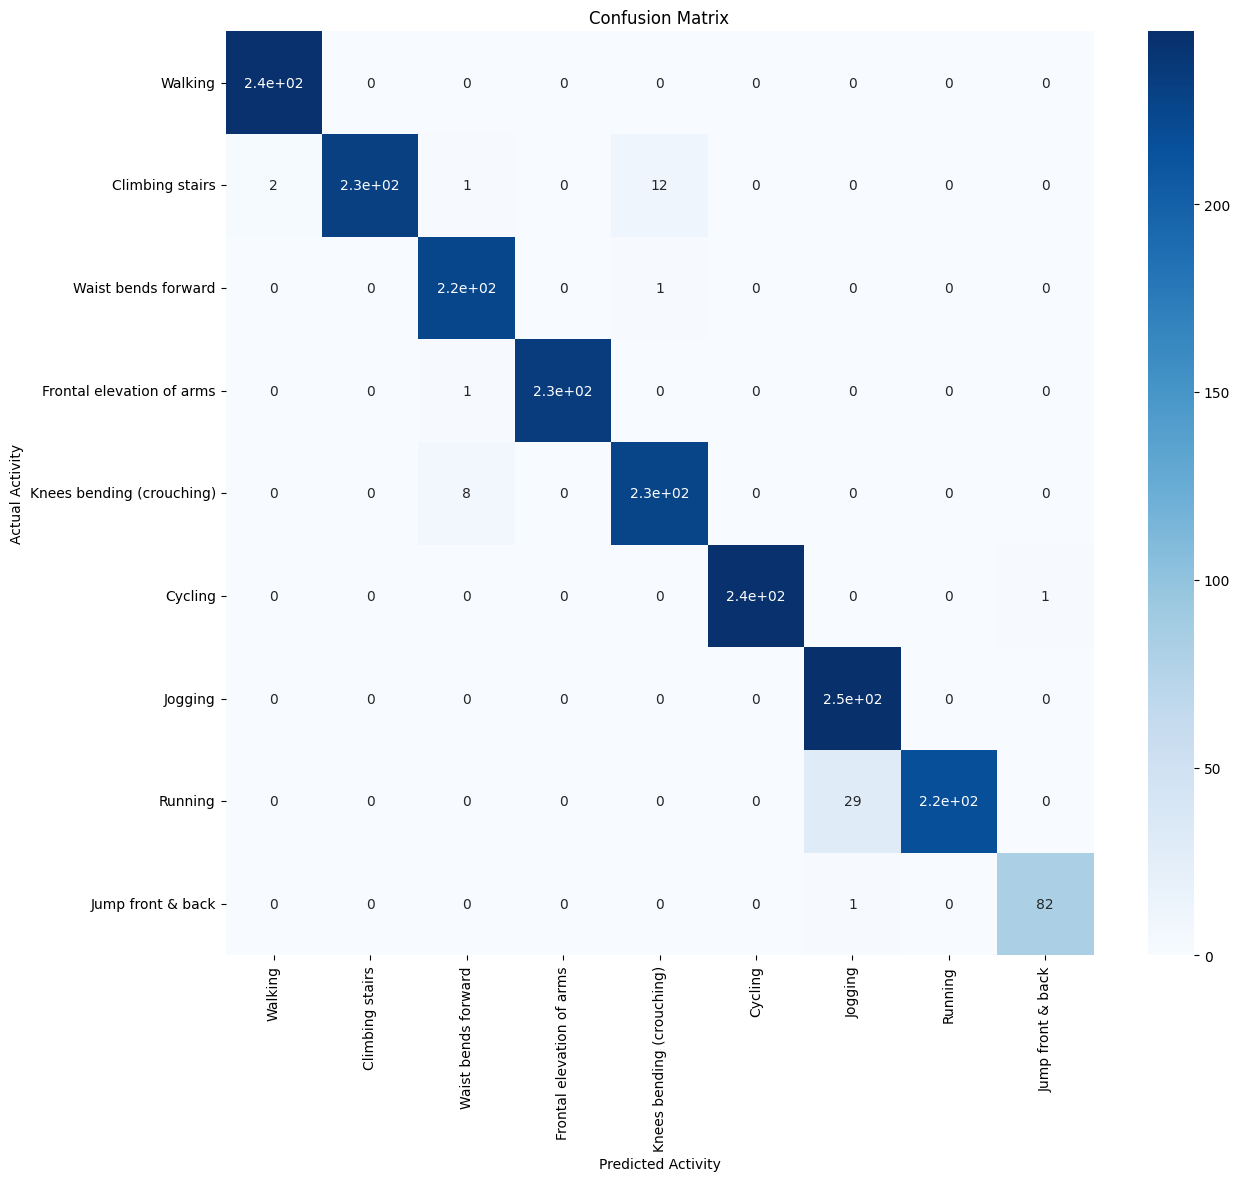

Accuracy Score: 97.2112%
Precision Score: 97.4938%
Recall Score: 97.3589%
F_1 Score: 97.3344%


In [27]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN2-LSTM3

In [38]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))


model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))




model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_17 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_18 (TimeD  (None, None, 21, 64)      12352     
 istributed)                                                     
                                                                 
 time_distributed_19 (TimeD  (None, None, 21, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_20 (TimeD  (None, None, 10, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_21 (TimeD  (None, None, 640)        

In [29]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 10s 18ms/step - loss: 1.0613 - accuracy: 0.5977 - val_loss: 0.2613 - val_accuracy: 0.9116
Epoch 2/10
201/201 [==============================] - 3s 13ms/step - loss: 0.3196 - accuracy: 0.8781 - val_loss: 0.0990 - val_accuracy: 0.9564
Epoch 3/10
201/201 [==============================] - 3s 13ms/step - loss: 0.2114 - accuracy: 0.9239 - val_loss: 0.0584 - val_accuracy: 0.9788
Epoch 4/10
201/201 [==============================] - 2s 10ms/step - loss: 0.1631 - accuracy: 0.9430 - val_loss: 0.0698 - val_accuracy: 0.9701
Epoch 5/10
201/201 [==============================] - 2s 10ms/step - loss: 0.1342 - accuracy: 0.9530 - val_loss: 0.0349 - val_accuracy: 0.9888
Epoch 6/10
201/201 [==============================] - 2s 11ms/step - loss: 0.1016 - accuracy: 0.9667 - val_loss: 0.0557 - val_accuracy: 0.9757
Epoch 7/10
201/201 [==============================] - 2s 10ms/step - loss: 0.1047 - accuracy: 0.9642 - val_loss: 0.0717 - val_accuracy: 0.972

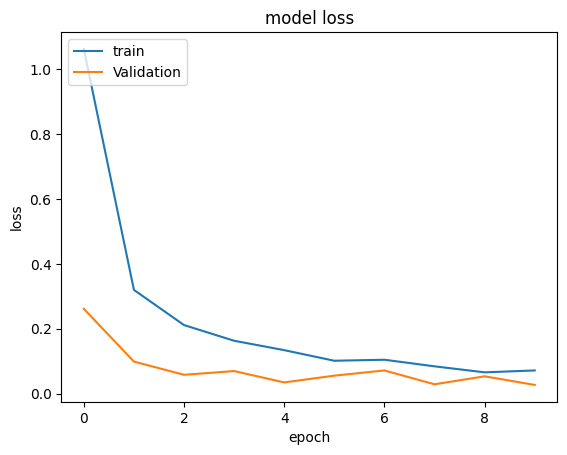

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

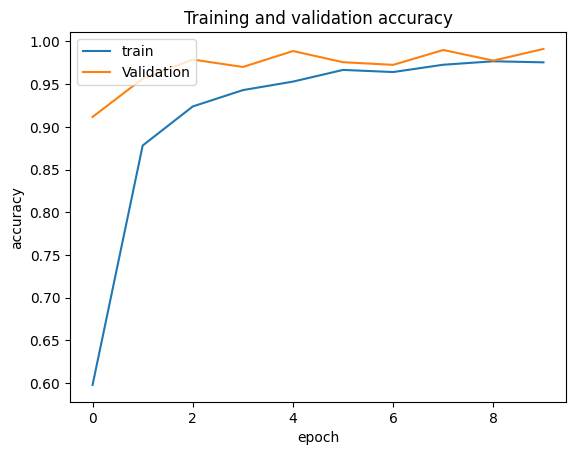

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

63/63 [==============================] - 1s 4ms/step


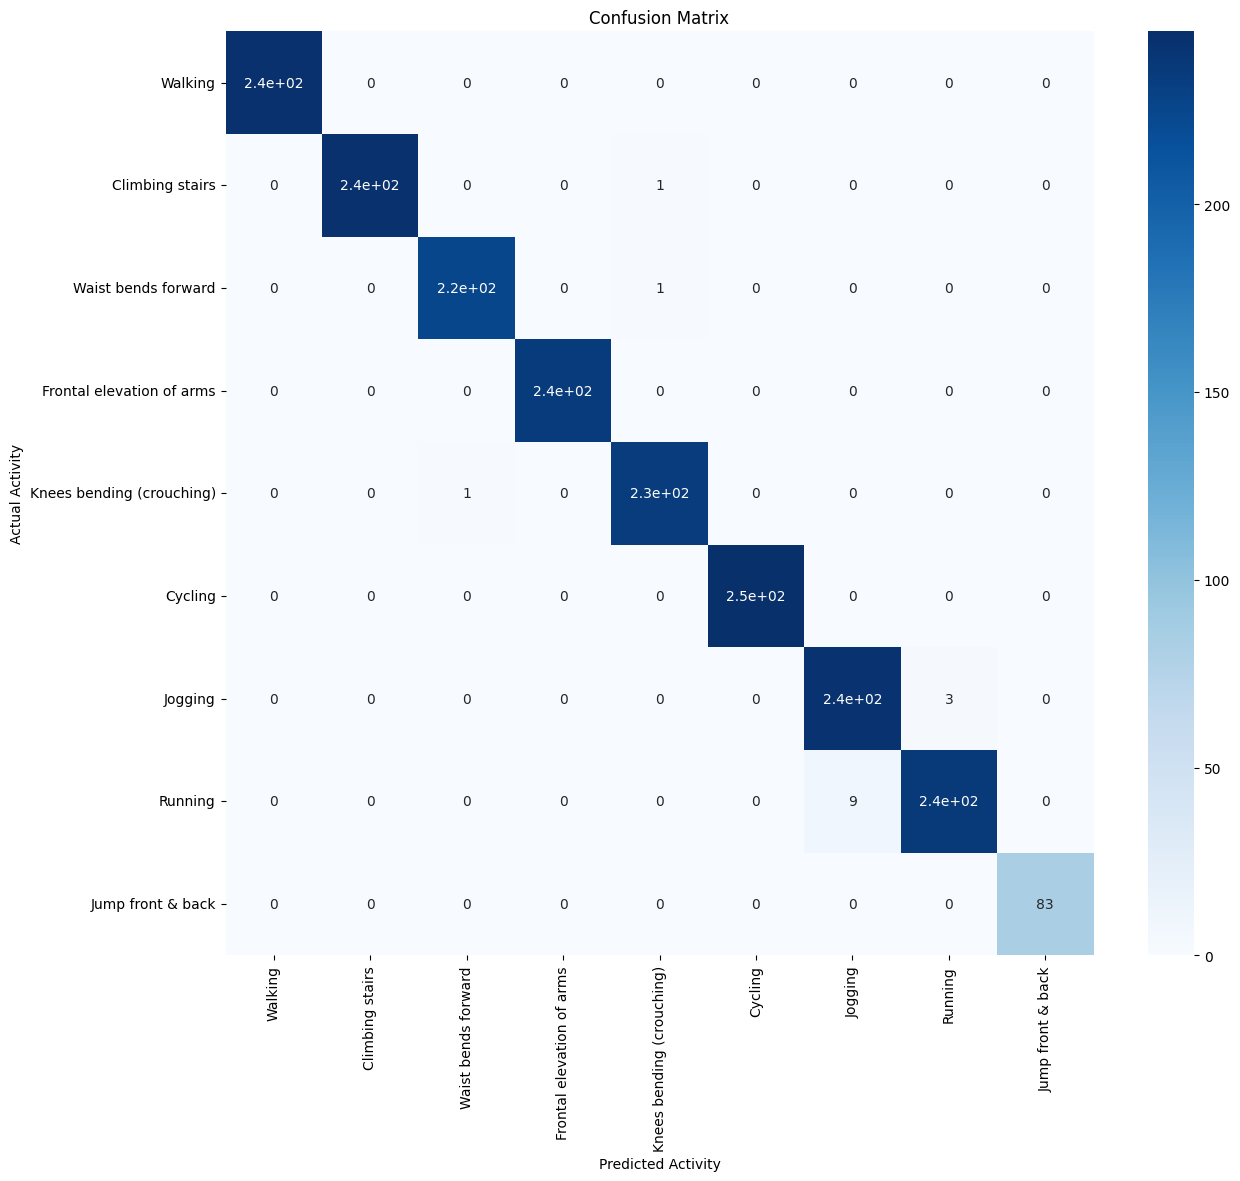

Accuracy Score: 99.2530%
Precision Score: 99.3210%
Recall Score: 99.3164%
F_1 Score: 99.3153%


In [32]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)

# CNN1 -LSTM4

In [44]:

# define model
model = Sequential()
model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'), input_shape=(None,n_length,n_features)))

model.add(TimeDistributed(Dropout(0.5)))
model.add(TimeDistributed(MaxPooling1D(pool_size=2)))

model.add(TimeDistributed(Flatten()))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(100,return_sequences=True))
model.add(Dropout(0.5))

model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_31 (TimeD  (None, None, 23, 64)      4096      
 istributed)                                                     
                                                                 
 time_distributed_32 (TimeD  (None, None, 23, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_33 (TimeD  (None, None, 11, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_34 (TimeD  (None, None, 704)         0         
 istributed)                                                     
                                                                 
 lstm_12 (LSTM)              (None, None, 100)        

In [45]:
# validation_split = 0.1
train_epochs = 10
history = model.fit(X_train, y_train, epochs=train_epochs, verbose=True,  validation_data = (X_val, y_val))


Epoch 1/10
201/201 [==============================] - 13s 20ms/step - loss: 1.1661 - accuracy: 0.5441 - val_loss: 0.3843 - val_accuracy: 0.8152
Epoch 2/10
201/201 [==============================] - 2s 11ms/step - loss: 0.4267 - accuracy: 0.8271 - val_loss: 0.2305 - val_accuracy: 0.8874
Epoch 3/10
201/201 [==============================] - 2s 11ms/step - loss: 0.2850 - accuracy: 0.8890 - val_loss: 0.1125 - val_accuracy: 0.9552
Epoch 4/10
201/201 [==============================] - 2s 11ms/step - loss: 0.2211 - accuracy: 0.9219 - val_loss: 0.0967 - val_accuracy: 0.9645
Epoch 5/10
201/201 [==============================] - 3s 15ms/step - loss: 0.1806 - accuracy: 0.9373 - val_loss: 0.0483 - val_accuracy: 0.9857
Epoch 6/10
201/201 [==============================] - 3s 15ms/step - loss: 0.1443 - accuracy: 0.9507 - val_loss: 0.0600 - val_accuracy: 0.9701
Epoch 7/10
201/201 [==============================] - 2s 11ms/step - loss: 0.1172 - accuracy: 0.9616 - val_loss: 0.0395 - val_accuracy: 0.986

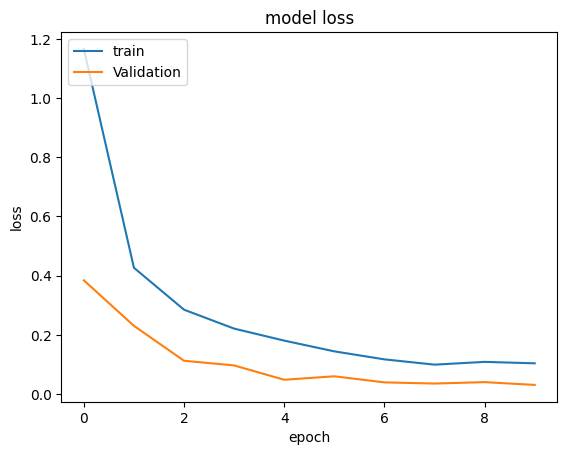

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

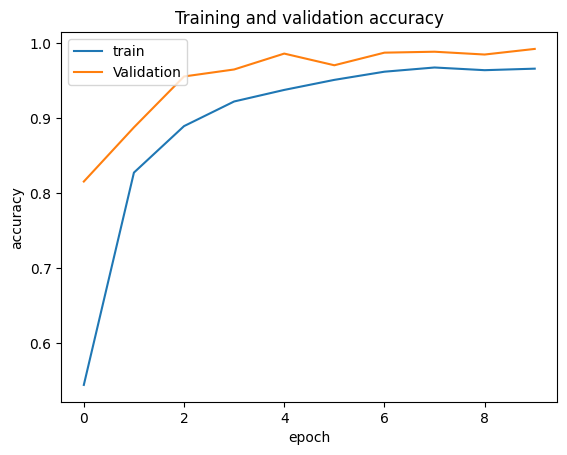

In [47]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

63/63 [==============================] - 2s 5ms/step


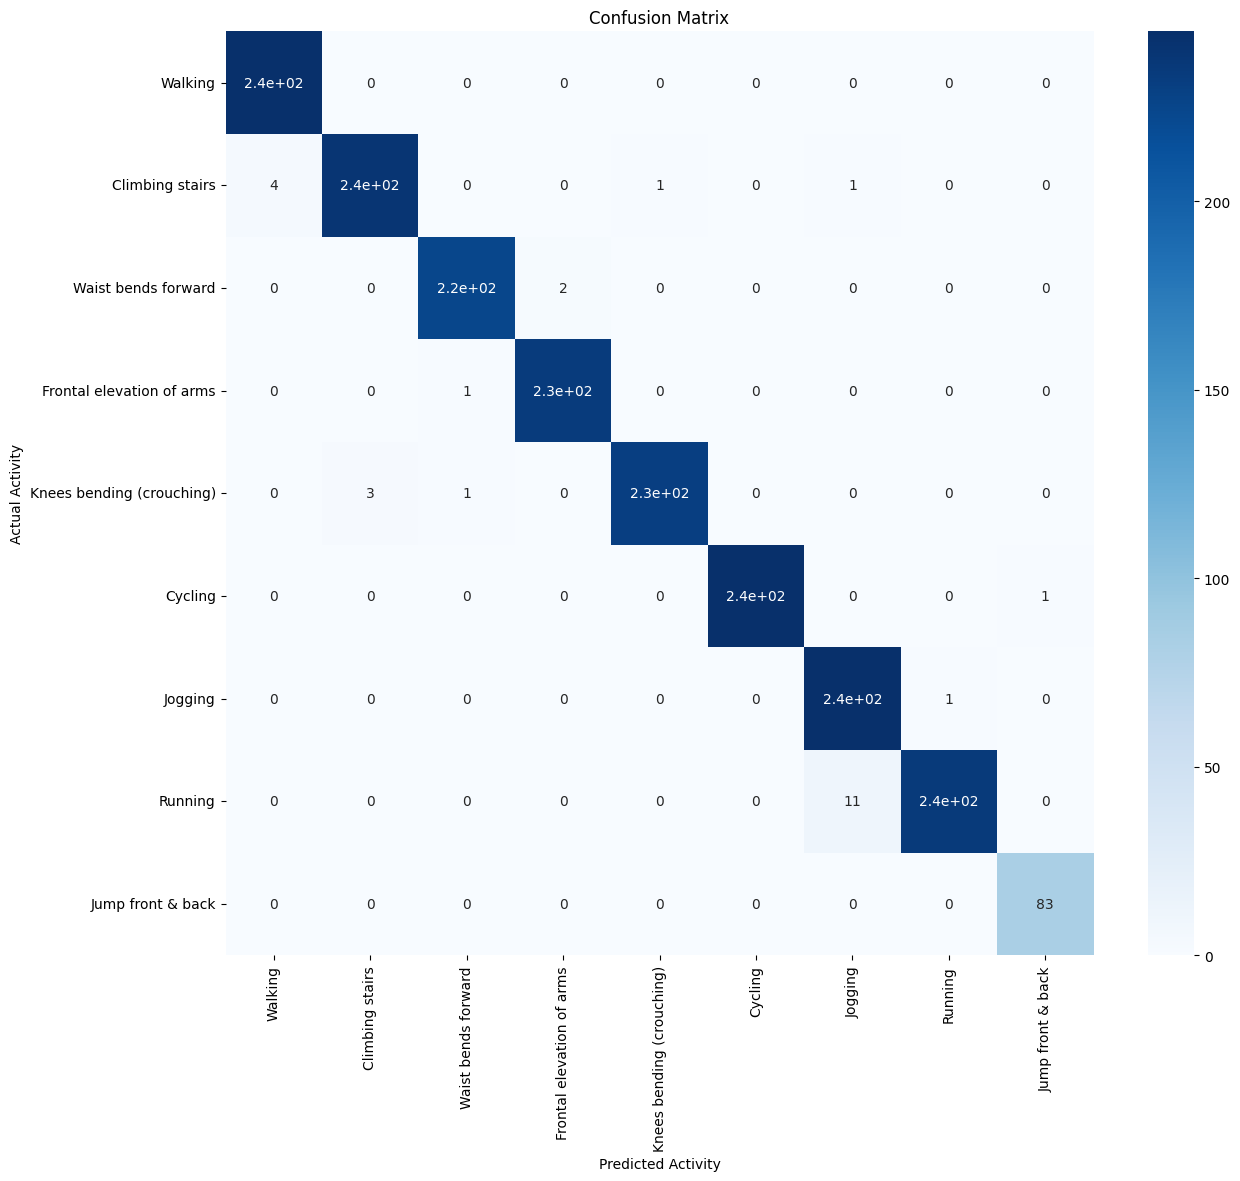

Accuracy Score: 98.7052%
Precision Score: 98.7458%
Recall Score: 98.8071%
F_1 Score: 98.7645%


In [48]:
# Make predictions on the test data
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis = 1)
y_pred = y_pred.reshape(-1,1)
y_pred.shape
y_true = np.argmax(y_test, axis=1).reshape(-1,1)
# Show results
# Note: Needed slice test data to 25 and onwards to match predictions due to time step in model
results_summarizer(y_true, y_pred)